In [128]:
import pandas as pd 
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
db = pd.read_csv('MS_Dhoni_ODI_record.csv')
db

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


#### Basic Checks

In [130]:
db.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [131]:
db.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,v New Zealand,Manchester,09/07/2019,ODI # 4190


#### Data Cleaning 

In [132]:
db['opposition'] = db['opposition'].apply(lambda x:x.lstrip('v '))
#db['opposition'] = db['opposition'].apply(lambda x:x[2:])
db

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


##### Feature Engineering 
* creating new features from given attributes in table 

In [133]:
# Adding feature - 'year' using match date column
# First convert date column into datetime format
db['date'] = pd.to_datetime(db['date'], dayfirst=True) # default object type --> convereted to datetime # dayfirst - DD/MM/YYYY format 
db['year'] = db['date'].dt.year.astype(int) # to perform this step above column { db['date] } must be converted to datetime 
db.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005


##### Apply method
* the apply method in pandas allow us to apply a function to each element in a dataframe or series.

In [134]:
db['score'] = db['score'].apply(str)# default object type --> convereted to str
db['not out'] = np.where(db['score'].str.endswith('*'),1,0) # 1 -> not out 0 --> out

##### Drop 
* Used to drop unwanted columns and inplace true reflects changes into original dataframe

In [135]:
db.drop(columns='odi_number',inplace=True)
db

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


##### Loc
* .loc[] and iloc[] <-- index // requried are used to obtain specific rows and columns of table

In [136]:
df_new = db.loc[((db['score'] != 'DNB') & (db['score'] != 'TDNB')),'runs_scored':] 
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


##### astype(type)
* Used to convert datatype of all values in a column/attribute

In [137]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

In [138]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   runs_scored  297 non-null    int64         
 1   balls_faced  297 non-null    int64         
 2   strike_rate  297 non-null    float64       
 3   fours        297 non-null    int64         
 4   sixes        297 non-null    int64         
 5   opposition   297 non-null    object        
 6   ground       297 non-null    object        
 7   date         297 non-null    datetime64[ns]
 8   year         297 non-null    int64         
 9   not out      297 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 25.5+ KB


#### career stats

In [139]:
# Frist Match
frist_match_match = db['date'].dt.date.min().strftime('%B %d,%Y')
print('frist match : ',frist_match_match)
# Last Match
last_match_match = db['date'].dt.date.max().strftime('%B %d,%Y')
print('last match : ',last_match_match)

frist match :  December 23,2004
last match :  July 09,2019


In [140]:
number_of_matches = db.shape[0] # Number of MAtches played in career
print("number of matches :", number_of_matches)

number of matches : 350


In [141]:
number_of_inns = df_new.shape[0] # number of innings 
print("number of inns played : ",number_of_inns)

number of inns played :  297


In [142]:
not_outs = df_new['not out'].sum() # number of not out inns in career
print("number_of_not outs: ", not_outs )

number_of_not outs:  84


In [143]:
runs_scored = df_new['runs_scored'].sum() # total of runs scored in career
print("total runs scored : ", runs_scored)

total runs scored :  10773


In [144]:
balls_faces = df_new['balls_faced'].sum() # number of balls faced in carees
print("total number of bass faced : ",balls_faces)

total number of bass faced :  12303


In [145]:
career_sr = (runs_scored/balls_faces)*100 # career strike rate
print('Career strike rate; {:.2f}'.format(career_sr)) # same as f_string 
career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print(f'Carrer average:{career_avg:0.2f}') # using f_string 

Career strike rate; 87.56
Carrer average:50.58


In [146]:

highest_score_date = df_new.loc[df_new['runs_scored'] == df_new['runs_scored'].max(),:]
highest_score_date

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out
21,183,145,126.2,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1


In [147]:
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(),'date'].values[0]
highest_score_date

numpy.datetime64('2005-10-31T00:00:00.000000000')

In [148]:
highest_score = db.loc[db.date == highest_score_date,'score'].values[0] #.values gives all vaules of column
print("Highest Score in Carrer : ",highest_score) # highest Score 

Highest Score in Carrer :  183*


In [149]:
hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s #.shape gives sum of vaules of column
print('Number of 100s : ',hundreds)

Number of 100s :  10


In [150]:
fifties = df_new.loc[(df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100) ].shape[0] # number of 100s #.shape gives sum of vaules of column
print('Number of 100s : ',fifties)

Number of 100s :  73


In [151]:
df_new.loc[:,'runs_scored'] >= 50


0      False
1      False
2      False
3      False
4       True
       ...  
344    False
345     True
346    False
347    False
349     True
Name: runs_scored, Length: 297, dtype: bool

In [152]:
df_new['fifties'] = np.where(((df_new.loc[:,'runs_scored'] >= 50) & (df_new.loc[:,'runs_scored'] < 100)),1,0)
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out,fifties
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1,0
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0,0
...,...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1,0
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0,0


In [153]:
df_new['fifties'] = np.where(((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)),1,0)

df_new['hundreds'] = np.where(df_new['runs_scored'] >= 100,1,0)
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not out,fifties,hundreds
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0,0,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0,0,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1,0,0
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0,0,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0,0,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1,1,0
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1,0,0
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0,0,0


In [154]:
df_new.loc[:,'runs_scored']

0        0
1       12
2        7
3        3
4      148
      ... 
344     28
345     56
346     42
347     35
349     50
Name: runs_scored, Length: 297, dtype: int64

In [155]:
df_new['fours'].sum()

826

In [156]:
df_new['sixes'].sum()

229

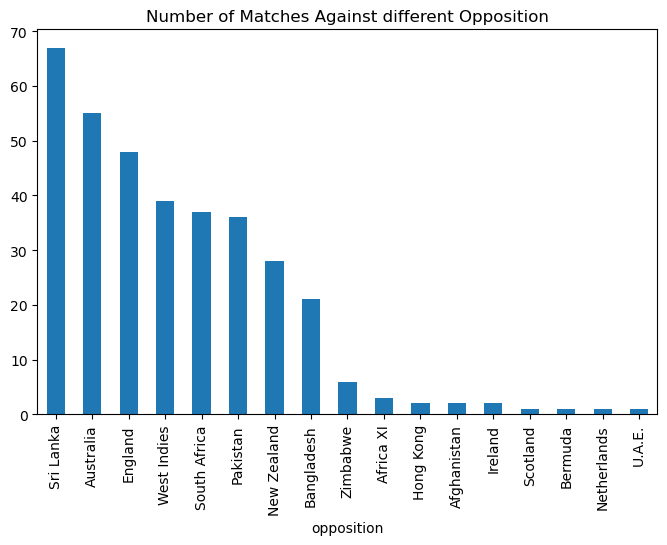

In [157]:
# number of matches played against different oppositions 
db['opposition'].value_counts().plot(kind='bar',title='Number of Matches Against different Opposition',figsize=(8,5));
plt.show() # Semicolon Supresses the Text Info along with graph

              runs_scored
opposition               
Afghanistan            36
Africa XI             174
Australia            1660
Bangladesh            569
Bermuda                29
England              1546
Hong Kong             109
Ireland                34
Netherlands            19
New Zealand           940
Pakistan             1231
South Africa          830
Sri Lanka            2383
West Indies          1005
Zimbabwe              208


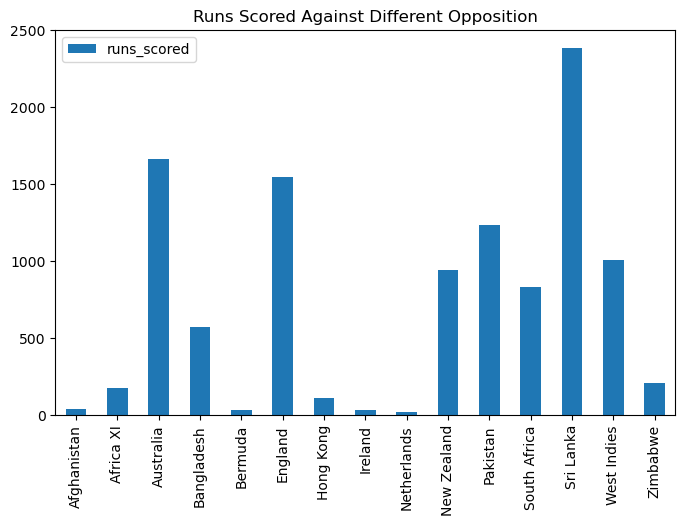

In [158]:
# Runs scored against each team 
runs_scored_wrt_opposition = pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
print(runs_scored_wrt_opposition)
runs_scored_wrt_opposition.plot(kind='bar',title='Runs Scored Against Different Opposition',figsize=(8,5))
plt.xlabel(None);
plt.show()

<Axes: xlabel='opposition'>

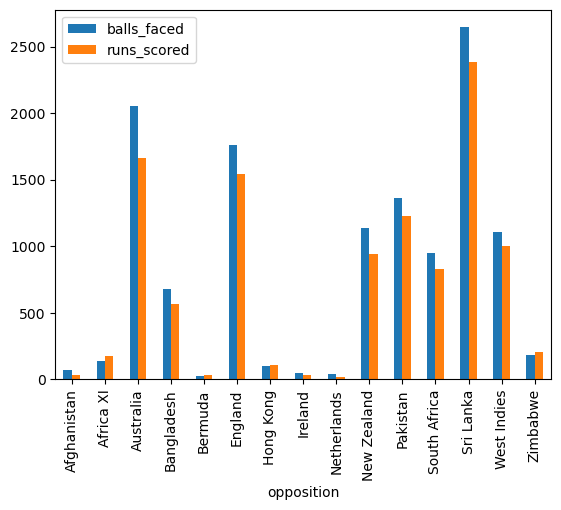

In [159]:
df9 = df_new.groupby('opposition')[['balls_faced','runs_scored']].sum().plot(kind='bar',)
df9

1. crate a DF runs_scored_by_opposition
2. crate a DF not_outs_by_opposition
3. crate a DF innings_by_opposition
4. mearge all

#### batting avrage aginst each team
* this line groups the DataFrame df_new bt the 'opposition' column and counts the number of entries (innings) gor each unique_value in the 'oppisition' column. it creats a new DataFrame innings_by_opposition with the opposition team as the index and the number of innings  as a column

In [160]:
innings_by_opposition = pd.DataFrame(df_new.groupby('opposition')['date'].count())
print(innings_by_opposition)

              date
opposition        
Afghanistan      2
Africa XI        3
Australia       48
Bangladesh      17
Bermuda          1
England         44
Hong Kong        2
Ireland          1
Netherlands      1
New Zealand     26
Pakistan        31
South Africa    32
Sri Lanka       53
West Indies     33
Zimbabwe         3


In [161]:
not_outs_by_oppisition = pd.DataFrame(df_new.groupby('opposition')['not out'].sum())
print(not_outs_by_oppisition)

              not out
opposition           
Afghanistan         0
Africa XI           1
Australia          11
Bangladesh          5
Bermuda             0
England            11
Hong Kong           1
Ireland             0
Netherlands         1
New Zealand         7
Pakistan            8
South Africa        6
Sri Lanka          16
West Indies        15
Zimbabwe            2


In [162]:
temp = runs_scored_wrt_opposition.merge(innings_by_opposition,left_index=True,right_index=True)
print(temp) # left_index=True,right_index=True use both index for merging (like inner Join)

              runs_scored  date
opposition                     
Afghanistan            36     2
Africa XI             174     3
Australia            1660    48
Bangladesh            569    17
Bermuda                29     1
England              1546    44
Hong Kong             109     2
Ireland                34     1
Netherlands            19     1
New Zealand           940    26
Pakistan             1231    31
South Africa          830    32
Sri Lanka            2383    53
West Indies          1005    33
Zimbabwe              208     3


In [163]:
average_by_opposition = temp.merge(not_outs_by_oppisition,left_index=True,right_index=True)
print(average_by_opposition)

              runs_scored  date  not out
opposition                              
Afghanistan            36     2        0
Africa XI             174     3        1
Australia            1660    48       11
Bangladesh            569    17        5
Bermuda                29     1        0
England              1546    44       11
Hong Kong             109     2        1
Ireland                34     1        0
Netherlands            19     1        1
New Zealand           940    26        7
Pakistan             1231    31        8
South Africa          830    32        6
Sri Lanka            2383    53       16
West Indies          1005    33       15
Zimbabwe              208     3        2


In [164]:
average_by_opposition.rename(columns={'date': 'innings'},inplace=True)
print(average_by_opposition)

              runs_scored  innings  not out
opposition                                 
Afghanistan            36        2        0
Africa XI             174        3        1
Australia            1660       48       11
Bangladesh            569       17        5
Bermuda                29        1        0
England              1546       44       11
Hong Kong             109        2        1
Ireland                34        1        0
Netherlands            19        1        1
New Zealand           940       26        7
Pakistan             1231       31        8
South Africa          830       32        6
Sri Lanka            2383       53       16
West Indies          1005       33       15
Zimbabwe              208        3        2


In [165]:
average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings']-average_by_opposition['not out']
print(average_by_opposition)

              runs_scored  innings  not out  eff_num_of_inns
opposition                                                  
Afghanistan            36        2        0                2
Africa XI             174        3        1                2
Australia            1660       48       11               37
Bangladesh            569       17        5               12
Bermuda                29        1        0                1
England              1546       44       11               33
Hong Kong             109        2        1                1
Ireland                34        1        0                1
Netherlands            19        1        1                0
New Zealand           940       26        7               19
Pakistan             1231       31        8               23
South Africa          830       32        6               26
Sri Lanka            2383       53       16               37
West Indies          1005       33       15               18
Zimbabwe              20

In [166]:
average_by_opposition['Average'] = average_by_opposition['runs_scored']/average_by_opposition['eff_num_of_inns']
print(average_by_opposition)

              runs_scored  innings  not out  eff_num_of_inns     Average
opposition                                                              
Afghanistan            36        2        0                2   18.000000
Africa XI             174        3        1                2   87.000000
Australia            1660       48       11               37   44.864865
Bangladesh            569       17        5               12   47.416667
Bermuda                29        1        0                1   29.000000
England              1546       44       11               33   46.848485
Hong Kong             109        2        1                1  109.000000
Ireland                34        1        0                1   34.000000
Netherlands            19        1        1                0         inf
New Zealand           940       26        7               19   49.473684
Pakistan             1231       31        8               23   53.521739
South Africa          830       32        6        

In [167]:
average_by_opposition.replace(np.inf,np.nan,inplace=True)
print(average_by_opposition)

              runs_scored  innings  not out  eff_num_of_inns     Average
opposition                                                              
Afghanistan            36        2        0                2   18.000000
Africa XI             174        3        1                2   87.000000
Australia            1660       48       11               37   44.864865
Bangladesh            569       17        5               12   47.416667
Bermuda                29        1        0                1   29.000000
England              1546       44       11               33   46.848485
Hong Kong             109        2        1                1  109.000000
Ireland                34        1        0                1   34.000000
Netherlands            19        1        1                0         NaN
New Zealand           940       26        7               19   49.473684
Pakistan             1231       31        8               23   53.521739
South Africa          830       32        6        

In [168]:
major_nations = ['Australia','England','New Zealand', 'Pakistan','South Africa','Sri Lanka' , 'West Indies']
print(major_nations)

['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']


### Plotting the graph

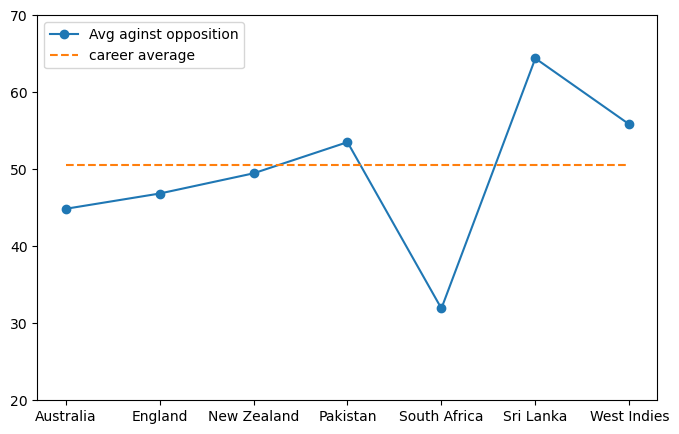

In [189]:
plt.figure(figsize=(8,5))
plt.plot(average_by_opposition.loc[major_nations,'Average'].values,marker='o');
plt.plot([career_avg]*len(major_nations),'--');
plt.xticks(range(0,7), major_nations);
plt.ylim(20,70)
plt.legend(['Avg aginst opposition','career average'])
plt.show()

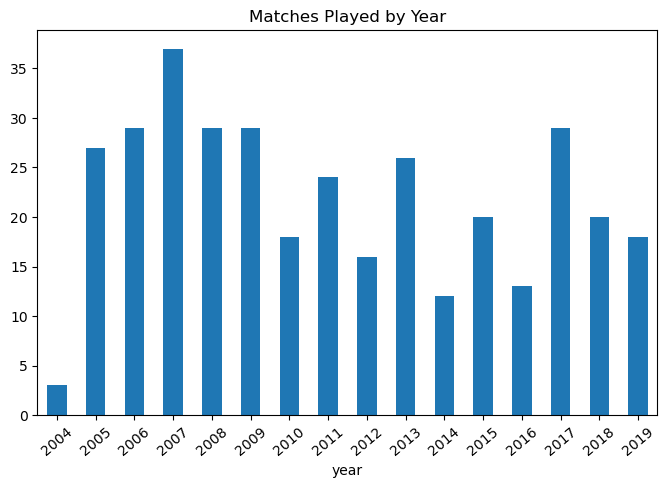

In [198]:
db['year'].value_counts().sort_index().plot(kind='bar',title='Matches Played by Year',figsize=(8,5))
plt.xticks(rotation=40)
plt.show()

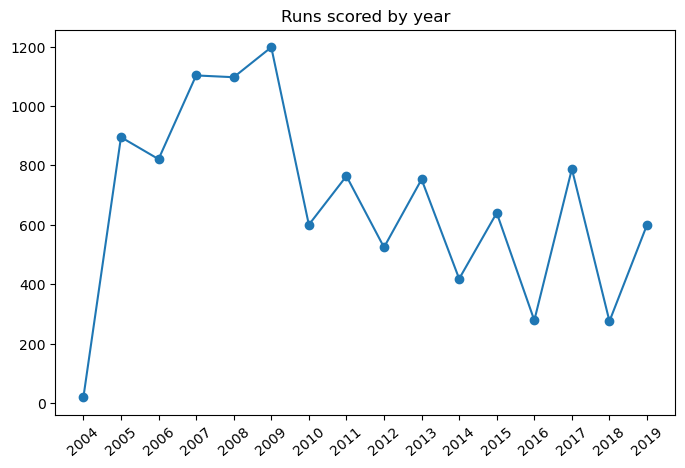

In [200]:
# Year Wise Reco
df_new.groupby('year')['runs_scored'].sum().plot(kind='line',marker='o',title='Runs scored by year',figsize=(8,5))
years= db['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None)
plt.xticks(rotation=40);
